# Importación de Librerías y Lectura de Datos

In [63]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import heapq  # Para manejar la lista de eventos como una cola de prioridad
from tqdm import tqdm
np.random.seed(123) # Para reproducibilidad

# Lectura de datos
data = pd.read_csv('Clinica.csv')


#  Obtener Tiempos entre Llegadas y Tiempos de Servicio

In [64]:
arrival_times = data['Tiempo de Llegada (min)']
print(arrival_times)

print()

service_times = data['Tiempo de Servicio (min)']  
print(service_times)
service_times = service_times - 5 # Restamos los 5 minutos fijos

0       7.7
1       5.7
2      10.2
3      10.4
4       6.5
       ... 
295     1.2
296    10.9
297     0.4
298    43.3
299     7.0
Name: Tiempo de Llegada (min), Length: 300, dtype: float64

0      11.8
1       8.4
2       8.2
3       8.4
4      10.5
       ... 
295     9.4
296    11.9
297     8.8
298     9.5
299     9.3
Name: Tiempo de Servicio (min), Length: 300, dtype: float64


# Función para realizar Pruebas de Bondad de Ajuste

In [65]:
# Función para realizar pruebas de bondad de ajuste
def perform_gof_tests(data, distributions, alpha=0.05):
    resultados = []
    for dist_name, dist in distributions:
        # Ajustar los parámetros de la distribución a los datos
        params = dist.fit(data)
        
        # Realizar la prueba de Kolmogorov-Smirnov
        ks_stat, p_value = stats.kstest(data, dist_name, args=params)
        
        # Decisión de aceptación o rechazo
        if p_value > alpha:
            decision = "No se rechaza la hipótesis nula"
        else:
            decision = "Se rechaza la hipótesis nula"
        
        resultados.append({
            'Distribución': dist_name,
            'Estadístico KS': ks_stat,
            'Valor p': p_value,
            'Decisión': decision
        })
        
        # Graficar el histograma y la PDF ajustada
        plt.figure(figsize=(8, 4))
        plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Datos')
        
        x = np.linspace(min(data), max(data), 1000)
        pdf_fitted = dist.pdf(x, *params)
        plt.plot(x, pdf_fitted, 'r-', label=f'{dist_name} PDF')
        plt.title(f'Histograma y PDF ajustada para {dist_name}')
        plt.xlabel('Tiempo de Servicio (min)')
        plt.ylabel('Densidad')
        plt.legend()
        plt.show()
    
    return pd.DataFrame(resultados)

# Lista de distribuciones a probar
distributions = [
    ('expon', stats.expon),
    ('gamma', stats.gamma),
    ('weibull_min', stats.weibull_min),
    ('lognorm', stats.lognorm),
    ('beta', stats.beta),
    ('triang', stats.triang)
]

# Prueba de Bondad de Ajuste para Tiempos entre Llegadas

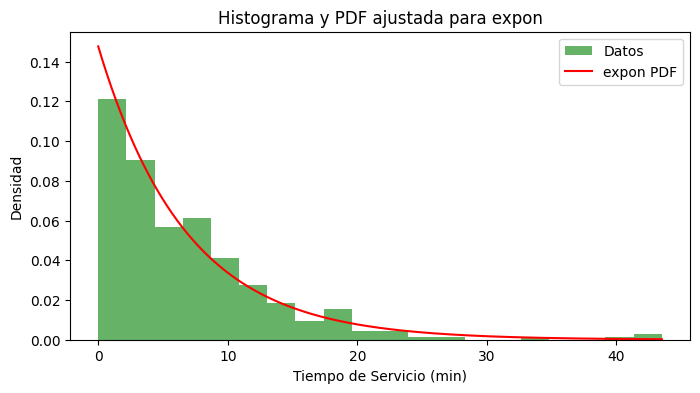

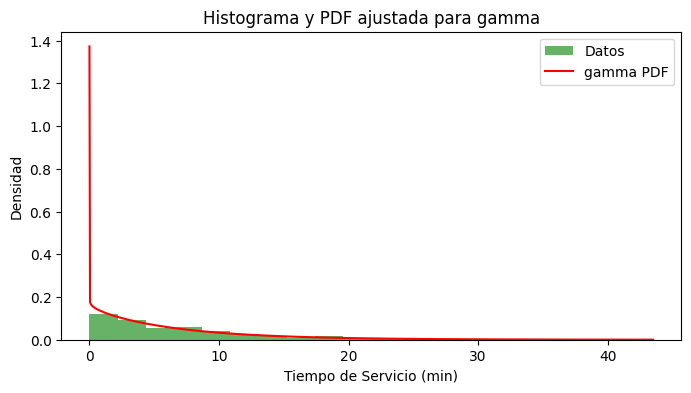

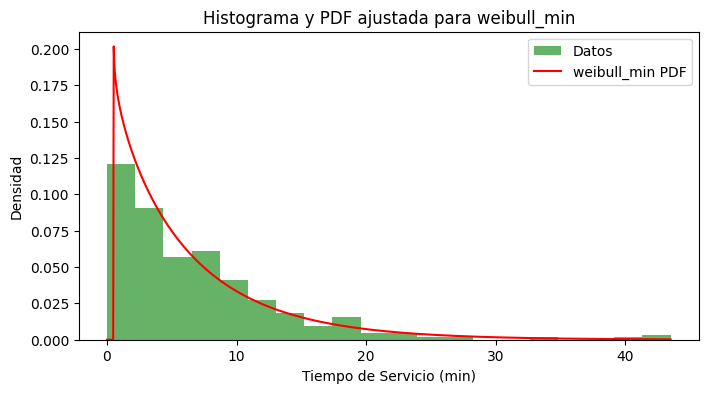

/home/socub/.conda/envs/mos_parcial_3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/home/socub/.conda/envs/mos_parcial_3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


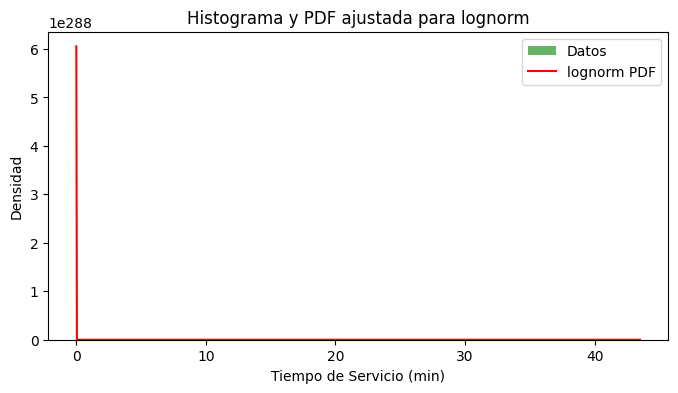

/home/socub/.conda/envs/mos_parcial_3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/socub/.conda/envs/mos_parcial_3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


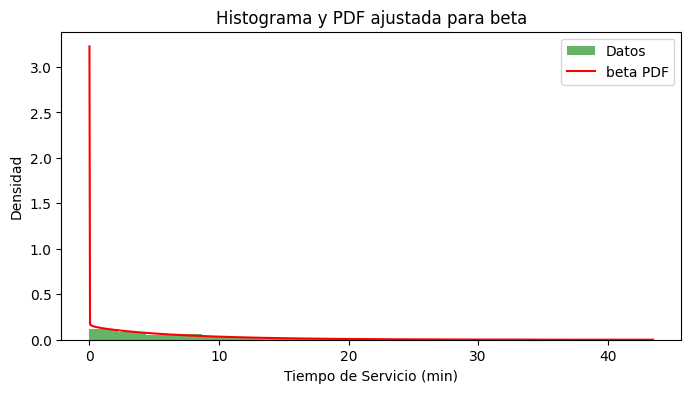

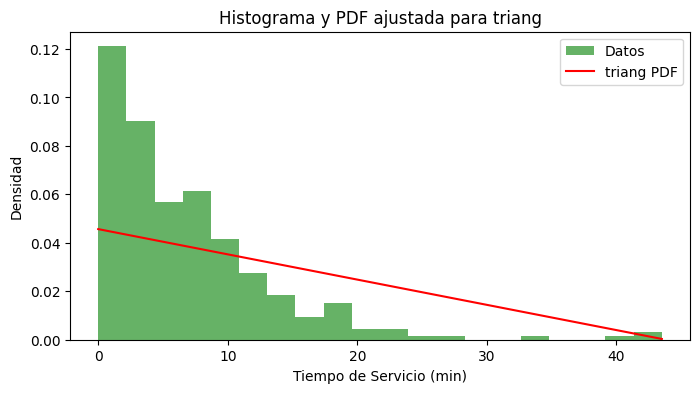

Pruebas de bondad de ajuste para tiempos de llegada:
  Distribución  Estadístico KS       Valor p                         Decisión
0        expon        0.045565  5.463812e-01  No se rechaza la hipótesis nula
1        gamma        0.051585  3.886398e-01  No se rechaza la hipótesis nula
2  weibull_min        0.076667  5.575857e-02  No se rechaza la hipótesis nula
3      lognorm        0.501763  2.107621e-70     Se rechaza la hipótesis nula
4         beta        0.039920  7.099192e-01  No se rechaza la hipótesis nula
5       triang        0.384863  1.723843e-40     Se rechaza la hipótesis nula




In [66]:
# Prueba de bondad de ajuste para tiempos entre llegadas
mu_service = 1 / np.mean(arrival_times)
resultados_gof_arrival = perform_gof_tests(arrival_times, distributions)
print("Pruebas de bondad de ajuste para tiempos de llegada:")
print(resultados_gof_arrival)
print("\n")

# Prueba de Bondad de Ajuste para Tiempos de Servicio

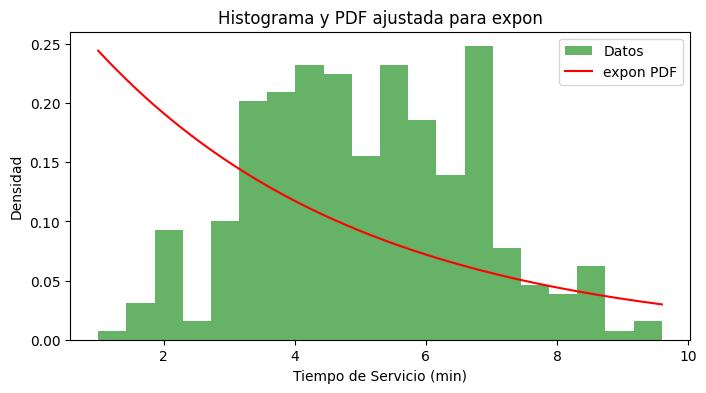

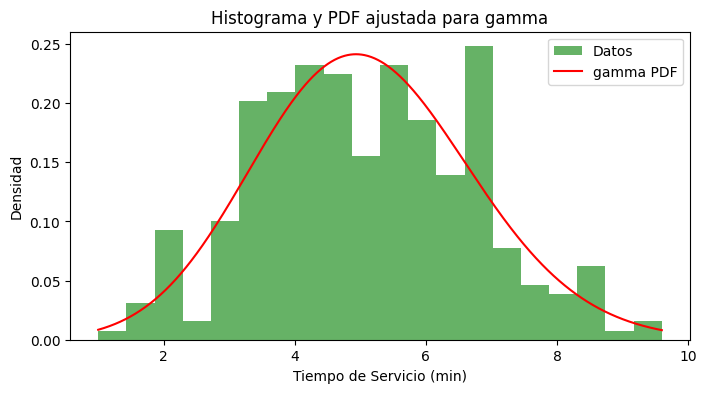

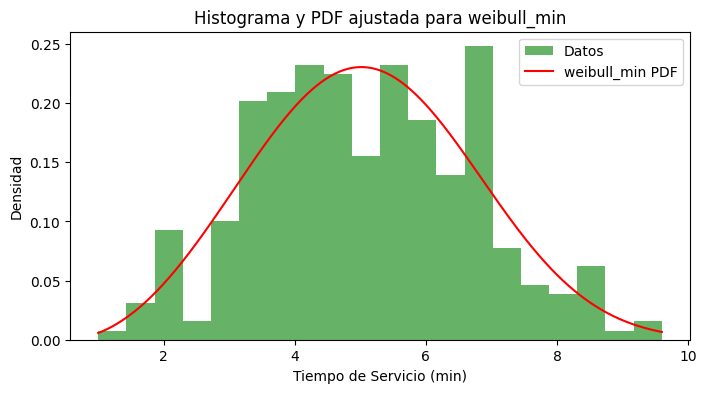

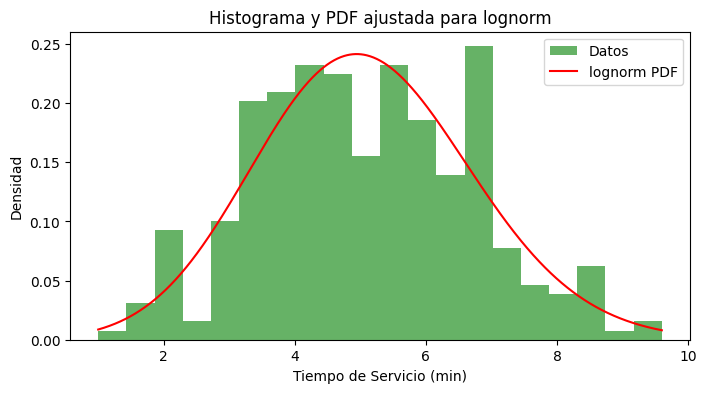

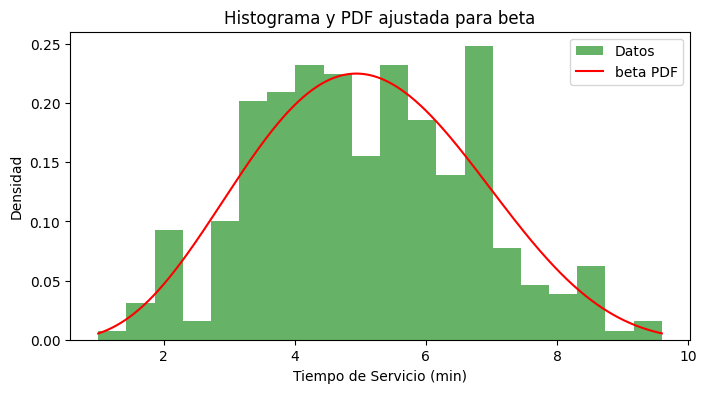

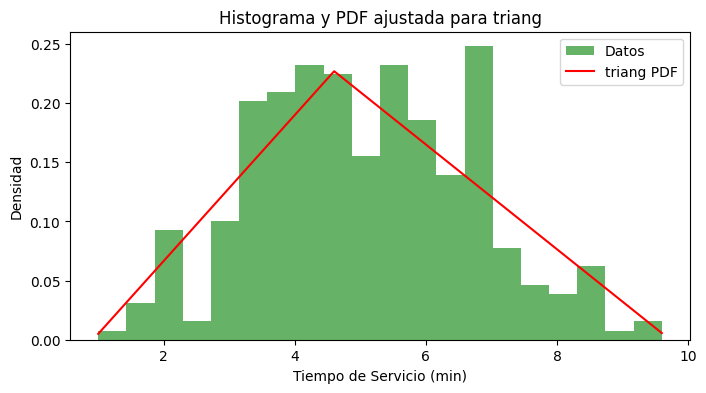

Pruebas de bondad de ajuste para tiempos de servicio:
  Distribución  Estadístico KS       Valor p                         Decisión
0        expon        0.318138  1.681647e-27     Se rechaza la hipótesis nula
1        gamma        0.041910  6.519805e-01  No se rechaza la hipótesis nula
2  weibull_min        0.041420  6.663155e-01  No se rechaza la hipótesis nula
3      lognorm        0.042769  6.268830e-01  No se rechaza la hipótesis nula
4         beta        0.037464  7.791921e-01  No se rechaza la hipótesis nula
5       triang        0.063318  1.727986e-01  No se rechaza la hipótesis nula




In [67]:
# Prueba de bondad de ajuste para tiempos de servicio
mu_service = 1 / np.mean(service_times)
resultados_gof_service = perform_gof_tests(service_times, distributions)
print("Pruebas de bondad de ajuste para tiempos de servicio:")
print(resultados_gof_service)
print("\n")

# Selección de las Mejores Distribuciones Según Resultados

In [68]:
# Para tiempos entre llegadas
selected_interarrival_distribution = 'expon'  # Por ejemplo
# Ajustamos la distribución seleccionada y almacenamos los parámetros
# Si se desea ajustar otra distribución se necesita agregar el respectivo código
params = stats.expon.fit(arrival_times)
interarrival_params = {'loc': params[0], 'scale': params[1]}

# Para tiempos de servicio
selected_service_distribution = 'beta'  # Por ejemplo
# Ajustamos la distribución seleccionada y almacenamos los parámetros
# Si se desea ajustar otra distribución se necesita agregar el respectivo código
params = stats.beta.fit(service_times)
service_params = {'a': params[0], 'b': params[1], 'loc': params[2], 'scale': params[3]}

# Definición de funciones generadoras de Datos (Tiempos)

In [69]:
# Definimos las funciones generadoras
def generate_interarrival_time():
    """
    Genera un tiempo entre llegadas basado en la distribución seleccionada.

    Returns:
        float: Tiempo entre llegadas en minutos.
    """
    if selected_interarrival_distribution == 'expon':
        return stats.expon.rvs(loc=interarrival_params['loc'], scale=interarrival_params['scale'])
    elif selected_interarrival_distribution == 'gamma':
        return stats.gamma.rvs(a=interarrival_params['a'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
    elif selected_interarrival_distribution == 'weibull_min':
        return stats.weibull_min.rvs(c=interarrival_params['c'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
    elif selected_interarrival_distribution == 'lognorm':
        return stats.lognorm.rvs(s=interarrival_params['s'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
    elif selected_interarrival_distribution == 'beta':
        return stats.beta.rvs(a=interarrival_params['a'], b=interarrival_params['b'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
    elif selected_interarrival_distribution == 'triang':
        return stats.triang.rvs(c=interarrival_params['c'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
    else:
        raise ValueError("Distribución de tiempos entre llegadas no reconocida.")

def generate_service_time():
    """
    Genera un tiempo de servicio basado en la distribución seleccionada y suma los 5 minutos fijos.

    Returns:
        float: Tiempo de servicio en minutos.
    """
    if selected_service_distribution == 'expon':
        return stats.expon.rvs(loc=service_params['loc'], scale=service_params['scale']) + 5
    elif selected_service_distribution == 'gamma':
        return stats.gamma.rvs(a=service_params['a'], loc=service_params['loc'], scale=service_params['scale']) + 5
    elif selected_service_distribution == 'weibull_min':
        return stats.weibull_min.rvs(c=service_params['c'], loc=service_params['loc'], scale=service_params['scale']) + 5
    elif selected_service_distribution == 'lognorm':
        return stats.lognorm.rvs(s=service_params['s'], loc=service_params['loc'], scale=service_params['scale']) + 5
    elif selected_service_distribution == 'beta':
        return stats.beta.rvs(a=service_params['a'], b=service_params['b'], loc=service_params['loc'], scale=service_params['scale']) + 5
    elif selected_service_distribution == 'triang':
        return stats.triang.rvs(c=service_params['c'], loc=service_params['loc'], scale=service_params['scale']) + 5
    else:
        raise ValueError("Distribución de tiempos de servicio no reconocida.")

# Definición de Meta Parámetros de la Simulación

In [79]:
# Cálculo del promedio de los tiempos entre llegadas basados en la distribución seleccionada
if selected_interarrival_distribution == 'expon':
    mean_interarrival_time = stats.expon.mean(loc=interarrival_params['loc'], scale=interarrival_params['scale'])
elif selected_interarrival_distribution == 'gamma':
    mean_interarrival_time = stats.gamma.mean(a=interarrival_params['a'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
elif selected_interarrival_distribution == 'weibull_min':
    mean_interarrival_time = stats.weibull_min.mean(c=interarrival_params['c'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
elif selected_interarrival_distribution == 'lognorm':
    mean_interarrival_time = stats.lognorm.mean(s=interarrival_params['s'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
elif selected_interarrival_distribution == 'beta':
    mean_interarrival_time = stats.beta.mean(a=interarrival_params['a'], b=interarrival_params['b'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
elif selected_interarrival_distribution == 'triang':
    mean_interarrival_time = stats.triang.mean(c=interarrival_params['c'], loc=interarrival_params['loc'], scale=interarrival_params['scale'])
else:
    raise ValueError("Distribución de tiempos entre llegadas no reconocida.")

print(f"Media de la distribución de tiempos de llegada: {mean_interarrival_time}")

# Cálculo del promedio de los tiempos de servicio basados en la distribución seleccionada, incluyendo los 5 minutos fijos
if selected_service_distribution == 'expon':
    mean_service_time = stats.expon.mean(loc=service_params['loc'], scale=service_params['scale']) + 5
elif selected_service_distribution == 'gamma':
    mean_service_time = stats.gamma.mean(a=service_params['a'], loc=service_params['loc'], scale=service_params['scale']) + 5
elif selected_service_distribution == 'weibull_min':
    mean_service_time = stats.weibull_min.mean(c=service_params['c'], loc=service_params['loc'], scale=service_params['scale']) + 5
elif selected_service_distribution == 'lognorm':
    mean_service_time = stats.lognorm.mean(s=service_params['s'], loc=service_params['loc'], scale=service_params['scale']) + 5
elif selected_service_distribution == 'beta':
    mean_service_time = stats.beta.mean(a=service_params['a'], b=service_params['b'], loc=service_params['loc'], scale=service_params['scale']) + 5
elif selected_service_distribution == 'triang':
    mean_service_time = stats.triang.mean(c=service_params['c'], loc=service_params['loc'], scale=service_params['scale']) + 5
else:
    raise ValueError("Distribución de tiempos de servicio no reconocida.")

print(f"Media de la distribución de tiempos de servicio: {mean_service_time}")

# Ahora calculamos m como el máximo de los dos promedios
m = max(mean_interarrival_time, mean_service_time)

# Cálculo del número óptimo de simulaciones usando el teorema de Tchebycheff
alpha = 0.05  # Probabilidad de error permitida
n_simulations = int((m ** 2) / alpha)
# Número de pacientes por simulación
num_patients = 300
print(f"Número óptimo de simulaciones: {n_simulations}\n")


Media de la distribución de tiempos de llegada: 6.771999999999999
Media de la distribución de tiempos de servicio: 10.09151836331869
Número óptimo de simulaciones: 2036



# Definición del Simulador

In [87]:
def simulate(n_simulations, num_patients):
    """
    Ejecuta múltiples simulaciones de un sistema de colas y recopila métricas de desempeño.
    
    Parameters:
        n_simulations (int): Número de simulaciones a ejecutar.
        num_patients (int): Número de pacientes por simulación.
    
    Returns:
        tuple: Promedios de utilización, tiempo máximo de espera, longitud promedio de cola y tiempo total promedio en el sistema.
    """
    # Listas para almacenar los resultados de cada simulación
    utilization_list = []
    max_waiting_time_list = []
    average_queue_length_list = []
    average_total_time_list = []
    
    # Bucle de simulación con barra de progreso
    for _ in tqdm(range(n_simulations), desc="Simulaciones", unit="sim"):
        # Inicialización de variables para cada simulación
        clock = 0
        server_busy = False
        queue = []
        total_busy_time = 0
        waiting_times = []
        queue_length_times = []
        total_times_in_system = []
        
        # Contadores
        num_arrivals = 0
        num_departures = 0
        
        # Lista de eventos (cola de prioridad)
        event_list = []
        
        # Definición de la clase Event (si no está definida globalmente)
        class Event:
            def __init__(self, time, event_type, event_handler):
                self.time = time
                self.event_type = event_type
                self.event_handler = event_handler
            
            def __lt__(self, other):
                return self.time < other.time
            
            def __str__(self):
                return f"Time: {self.time}, Type: {self.event_type}"
        
        # Funciones de manejador de eventos
        def arrival_handler(event, clock):
            nonlocal server_busy, event_list, queue, num_arrivals
            
            num_arrivals += 1  # Incrementamos el número de llegadas
            
            # Registrar longitud de la cola en el tiempo actual
            queue_length_times.append((clock, len(queue)))
            
            if server_busy or queue:
                # Servidor ocupado o hay cola, el paciente se une a la cola
                queue.append(clock)
            else:
                # Servidor libre y sin cola, programar inicio de servicio
                service_event = Event(clock, 'Service', service_handler)
                heapq.heappush(event_list, service_event)
            
            # Programar la llegada del siguiente paciente si no se ha alcanzado el número total
            if num_arrivals < num_patients:
                interarrival = generate_interarrival_time()
                next_arrival_time = clock + interarrival
                next_event = Event(next_arrival_time, 'Arrival', arrival_handler)
                heapq.heappush(event_list, next_event)
        
        def service_handler(event, clock):
            nonlocal server_busy, total_busy_time, event_list, queue, waiting_times, total_times_in_system
            
            server_busy = True  # Servidor ocupado
            
            # Determinar el tiempo de llegada del paciente que será atendido
            if queue:
                arrival_time = queue.pop(0)
                waiting_time = clock - arrival_time
                waiting_times.append(waiting_time)
                total_time_in_system = waiting_time  # Tiempo de espera inicial
            else:
                # Si no hay cola, el paciente llegó justo ahora
                arrival_time = clock
                total_time_in_system = 0  # Sin tiempo de espera
            
            # Generar tiempo de servicio
            service_time = generate_service_time()
            total_busy_time += service_time
            departure_time = clock + service_time
            
            # Programar evento de salida
            departure_event = Event(departure_time, 'Departure', departure_handler)
            heapq.heappush(event_list, departure_event)
            
            # Añadir tiempo de servicio al tiempo total en el sistema
            total_time_in_system += service_time
            total_times_in_system.append(total_time_in_system)
        
        def departure_handler(event, clock):
            nonlocal server_busy, event_list, queue, num_departures
            num_departures += 1  # Incrementamos el número de salidas
            
            # Registrar longitud de la cola en el tiempo actual
            queue_length_times.append((clock, len(queue)))
            
            if queue:
                # Hay pacientes en cola, programar inicio de servicio para el siguiente
                service_event = Event(clock, 'Service', service_handler)
                heapq.heappush(event_list, service_event)
            else:
                # No hay pacientes en cola, liberar el servidor
                server_busy = False
        
        # Programamos la llegada del primer paciente
        interarrival_time = generate_interarrival_time()
        arrival_time = clock + interarrival_time
        first_event = Event(arrival_time, 'Arrival', arrival_handler)
        heapq.heappush(event_list, first_event)
        
        # Bucle de simulación
        while event_list and num_departures < num_patients:
            # Extraer el siguiente evento
            current_event = heapq.heappop(event_list)
            clock = current_event.time
            # Procesar el evento
            current_event.event_handler(current_event, clock)
        
        # Después de procesar todos los pacientes, calcular métricas
        utilization = (total_busy_time / clock) * 100  # Porcentaje de tiempo ocupado
        max_waiting_time = max(waiting_times) if waiting_times else 0
        # Cálculo del número promedio de pacientes en cola
        if queue_length_times:
            times, lengths = zip(*queue_length_times)
            average_queue_length = np.trapz(lengths, times) / (times[-1] - times[0]) if (times[-1] - times[0]) > 0 else 0
        else:
            average_queue_length = 0
        average_total_time = np.mean(total_times_in_system) if total_times_in_system else 0
        
        # Almacenamos los resultados
        utilization_list.append(utilization)
        max_waiting_time_list.append(max_waiting_time)
        average_queue_length_list.append(average_queue_length)
        average_total_time_list.append(average_total_time)
    
    # Cálculo de resultados promedio
    avg_utilization = np.mean(utilization_list)
    avg_max_waiting_time = np.mean(max_waiting_time_list)
    avg_queue_length = np.mean(average_queue_length_list)
    avg_total_time = np.mean(average_total_time_list)
    
    return avg_utilization, avg_max_waiting_time, avg_queue_length, avg_total_time


# Ejecutar Simulaciones y Mostrar Resultados

In [88]:
# Ejecutar las simulaciones
avg_utilization, avg_max_waiting_time, avg_queue_length, avg_total_time = simulate(
    n_simulations, num_patients
)

# Mostrar los resultados
print("Resultados promedio de las simulaciones:")
print(f"1. Porcentaje de tiempo que la sala de atención está ocupada: {avg_utilization:.2f}%")
print(f"2. Tiempo máximo que un paciente puede esperar en la sala de espera: {avg_max_waiting_time:.2f} minutos")
print(f"3. Número promedio de pacientes en cola durante las horas pico: {avg_queue_length:.2f}")
print(f"4. Tiempo promedio total que un paciente pasa en la clínica: {avg_total_time:.2f} minutos")

Simulaciones:   0%|          | 0/2036 [00:00<?, ?sim/s]/tmp/ipykernel_1737502/4292341908.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_queue_length = np.trapz(lengths, times) / (times[-1] - times[0]) if (times[-1] - times[0]) > 0 else 0
Simulaciones: 100%|██████████| 2036/2036 [00:47<00:00, 43.01sim/s]

Resultados promedio de las simulaciones:
1. Porcentaje de tiempo que la sala de atención está ocupada: 99.60%
2. Tiempo máximo que un paciente puede esperar en la sala de espera: 1003.24 minutos
3. Número promedio de pacientes en cola durante las horas pico: 49.92
4. Tiempo promedio total que un paciente pasa en la clínica: 512.84 minutos


# Simulación con múltiples médicos

In [89]:
def simulate(n_simulations, num_patients, num_doctors):
    """
    Ejecuta múltiples simulaciones de un sistema de colas con múltiples servidores y recopila métricas de desempeño.
    
    Parameters:
        n_simulations (int): Número de simulaciones a ejecutar.
        num_patients (int): Número de pacientes por simulación.
        num_doctors (int): Número de médicos disponibles (servidores).
    
    Returns:
        tuple: Promedios de utilización, tiempo máximo de espera, longitud promedio de cola,
               tiempo total promedio en el sistema y lista de todos los tiempos de espera.
    """

    # Listas para almacenar los resultados de cada simulación
    utilization_list = []
    max_waiting_time_list = []
    average_queue_length_list = []
    average_total_time_list = []
    all_waiting_times = []  # Para almacenar todos los tiempos de espera de todas las simulaciones

    # Bucle de simulación con barra de progreso
    for _ in tqdm(range(n_simulations), desc="Simulaciones", unit="sim"):
        # Inicialización de variables para cada simulación
        clock = 0
        servers = [0] * num_doctors  # Lista para el tiempo en que cada servidor estará libre
        queue = []
        total_busy_time = [0] * num_doctors  # Tiempo total ocupado por cada servidor
        waiting_times = []
        queue_length_times = []
        total_times_in_system = []

        # Contadores
        num_arrivals = 0
        num_departures = 0

        # Lista de eventos (cola de prioridad)
        event_list = []

        # Definición de la clase Event
        class Event:
            def __init__(self, time, event_type, event_handler):
                self.time = time
                self.event_type = event_type
                self.event_handler = event_handler

            def __lt__(self, other):
                return self.time < other.time

            def __str__(self):
                return f"Time: {self.time}, Type: {self.event_type}"

        # Funciones de manejador de eventos
        def arrival_handler(event, clock):
            nonlocal event_list, queue, num_arrivals

            num_arrivals += 1  # Incrementamos el número de llegadas

            # Registrar longitud de la cola en el tiempo actual
            queue_length_times.append((clock, len(queue)))

            # Verificar si hay algún servidor libre
            available_server = None
            for i in range(num_doctors):
                if servers[i] <= clock:
                    available_server = i
                    break

            if available_server is not None:
                # Servidor libre, programar inicio de servicio
                service_event = Event(clock, 'Service', lambda e, c, s=available_server: service_handler(e, c, s))
                heapq.heappush(event_list, service_event)
            else:
                # Todos los servidores ocupados, el paciente se une a la cola
                queue.append(clock)

            # Programar la llegada del siguiente paciente si aún no se ha alcanzado el número total
            if num_arrivals < num_patients:
                interarrival = generate_interarrival_time()
                next_arrival_time = clock + interarrival
                next_event = Event(next_arrival_time, 'Arrival', arrival_handler)
                heapq.heappush(event_list, next_event)

        def service_handler(event, clock, server_id):
            nonlocal servers, total_busy_time, event_list, queue, waiting_times, total_times_in_system

            # Determinar el tiempo de llegada del paciente que será atendido
            if queue:
                arrival_time = queue.pop(0)
                waiting_time = clock - arrival_time
            else:
                # Si no hay cola, el paciente llegó justo ahora
                arrival_time = clock
                waiting_time = 0

            waiting_times.append(waiting_time)

            # Generar tiempo de servicio
            service_time = generate_service_time()
            total_busy_time[server_id] += service_time
            servers[server_id] = clock + service_time  # Actualizamos el tiempo en que el servidor estará libre

            total_time_in_system = waiting_time + service_time
            total_times_in_system.append(total_time_in_system)

            # Programar evento de salida
            departure_time = clock + service_time
            departure_event = Event(departure_time, 'Departure', lambda e, c, s=server_id: departure_handler(e, c, s))
            heapq.heappush(event_list, departure_event)

        def departure_handler(event, clock, server_id):
            nonlocal servers, event_list, queue, num_departures
            num_departures += 1  # Incrementamos el número de salidas

            # Registrar longitud de la cola en el tiempo actual
            queue_length_times.append((clock, len(queue)))

            if queue:
                # Hay pacientes en cola, programar inicio de servicio para el siguiente
                service_event = Event(clock, 'Service', lambda e, c, s=server_id: service_handler(e, c, s))
                heapq.heappush(event_list, service_event)
            else:
                # El servidor queda libre, su tiempo de disponibilidad ya está actualizado en 'servers'
                pass  # No se necesita acción adicional

        # Programamos la llegada del primer paciente
        arrival_time = clock + generate_interarrival_time()
        first_event = Event(arrival_time, 'Arrival', arrival_handler)
        heapq.heappush(event_list, first_event)

        # Bucle de simulación
        while event_list and num_departures < num_patients:
            # Extraer el siguiente evento
            current_event = heapq.heappop(event_list)
            clock = current_event.time
            # Procesar el evento
            current_event.event_handler(current_event, clock)

        # Después de procesar todos los pacientes, calcular métricas
        total_simulation_time = clock
        total_busy = sum(total_busy_time)
        utilization = (total_busy / (total_simulation_time * num_doctors)) * 100 if total_simulation_time > 0 else 0  # Porcentaje de tiempo ocupado

        max_waiting_time = max(waiting_times) if waiting_times else 0
        # Cálculo del número promedio de pacientes en cola
        if queue_length_times:
            times, lengths = zip(*queue_length_times)
            total_time = times[-1] - times[0] if times[-1] - times[0] > 0 else 1
            average_queue_length = np.trapz(lengths, times) / total_time
        else:
            average_queue_length = 0
        average_total_time = np.mean(total_times_in_system) if total_times_in_system else 0

        # Almacenamos los resultados
        utilization_list.append(utilization)
        max_waiting_time_list.append(max_waiting_time)
        average_queue_length_list.append(average_queue_length)
        average_total_time_list.append(average_total_time)
        all_waiting_times.extend(waiting_times)

    # Cálculo de resultados promedio
    avg_utilization = np.mean(utilization_list)
    avg_max_waiting_time = np.mean(max_waiting_time_list)
    avg_queue_length = np.mean(average_queue_length_list)
    avg_total_time = np.mean(average_total_time_list)

    return avg_utilization, avg_max_waiting_time, avg_queue_length, avg_total_time, all_waiting_times


# Cálculo de múltiples médicos necesarios

In [91]:
# Definición de la función para calcular el percentil
def calculate_percentile_waiting_time(waiting_times, percentile=95):
    return np.percentile(waiting_times, percentile)

# Ahora puedes ejecutar el bucle para encontrar el número mínimo de médicos
max_doctors = 10  # Máximo número de médicos a considerar
n_simulations = 2036  # Número de simulaciones
num_patients = 300  # Número de pacientes por simulación
percentile_target = 95  # Percentil objetivo
max_wait_time_allowed = 10  # Tiempo máximo de espera permitido en minutos

# Iterar sobre diferentes números de médicos
for num_doctors in range(1, max_doctors + 1):
    print(f"\nSimulando con {num_doctors} médicos...")
    avg_utilization, avg_max_waiting_time, avg_queue_length, avg_total_time, all_waiting_times = simulate(
        n_simulations, num_patients, num_doctors
    )
    
    # Calcular el percentil 95% de los tiempos de espera
    percentile_wait_time = calculate_percentile_waiting_time(all_waiting_times, percentile=percentile_target)
    
    print(f"Percentil {percentile_target}% del tiempo de espera: {percentile_wait_time:.2f} minutos")
    
    if percentile_wait_time <= max_wait_time_allowed:
        print(f"Con {num_doctors} médicos, se cumple el requisito de tiempo de espera máximo.")
        break
    else:
        print(f"Con {num_doctors} médicos, no se cumple el requisito.")


Simulando con 1 médicos...


Simulaciones:   0%|          | 0/2036 [00:00<?, ?sim/s]/tmp/ipykernel_1737502/967137657.py:149: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_queue_length = np.trapz(lengths, times) / total_time
Simulaciones: 100%|██████████| 2036/2036 [00:48<00:00, 41.72sim/s]


Percentil 95% del tiempo de espera: 986.24 minutos
Con 1 médicos, no se cumple el requisito.

Simulando con 2 médicos...


Simulaciones: 100%|██████████| 2036/2036 [00:49<00:00, 40.87sim/s]


Percentil 95% del tiempo de espera: 23.83 minutos
Con 2 médicos, no se cumple el requisito.

Simulando con 3 médicos...


Simulaciones: 100%|██████████| 2036/2036 [00:49<00:00, 40.94sim/s]


Percentil 95% del tiempo de espera: 5.85 minutos
Con 3 médicos, se cumple el requisito de tiempo de espera máximo.
